Processamento de arquivos Strava

Os dados foram obtidos conforme descrito do link:
https://www.reddit.com/r/Strava/comments/176n952/is_it_possible_to_export_all_activity_data_in_a/

Usei o método de entrar no link https://www.strava.com/athlete/delete_your_account mas não deletei a conta, claro, e sim cliquei, na opção **2 Download Request**, em **Request Your Archive**.

Isso fará o download de quase todos os seus dados do Strava. A mídia só veio a do ano corrente e os dados intermediários durante o pedal não vieram.

Para cada atividade é possível baixar os dados de batimento cardíaco no formato FIT, por enquanto fora do escopo desse projeto.




In [ ]:
! pip install seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_file = r"D:\Atrium\Projects\Strava\data\activities.csv"

In [3]:
df = pd.read_csv(data_file)

In [ ]:
df.head()

In [4]:
df['Activity Date'] = pd.to_datetime(df['Activity Date'])

In [5]:
df = df.dropna(axis=1, how='all')

In [ ]:
df.describe(include='all')

In [6]:
df['Activity Type'].value_counts()

Activity Type
Ride          233
Workout        98
Walk           24
Run            10
Elliptical      1
Name: count, dtype: int64

In [7]:
df_ride = df[df['Activity Type'] == 'Ride']

In [8]:
df_ride["Activity Date"].count()

np.int64(233)

In [9]:
df_ride = df_ride[df_ride['Activity Date'] >= '2022-01-01']

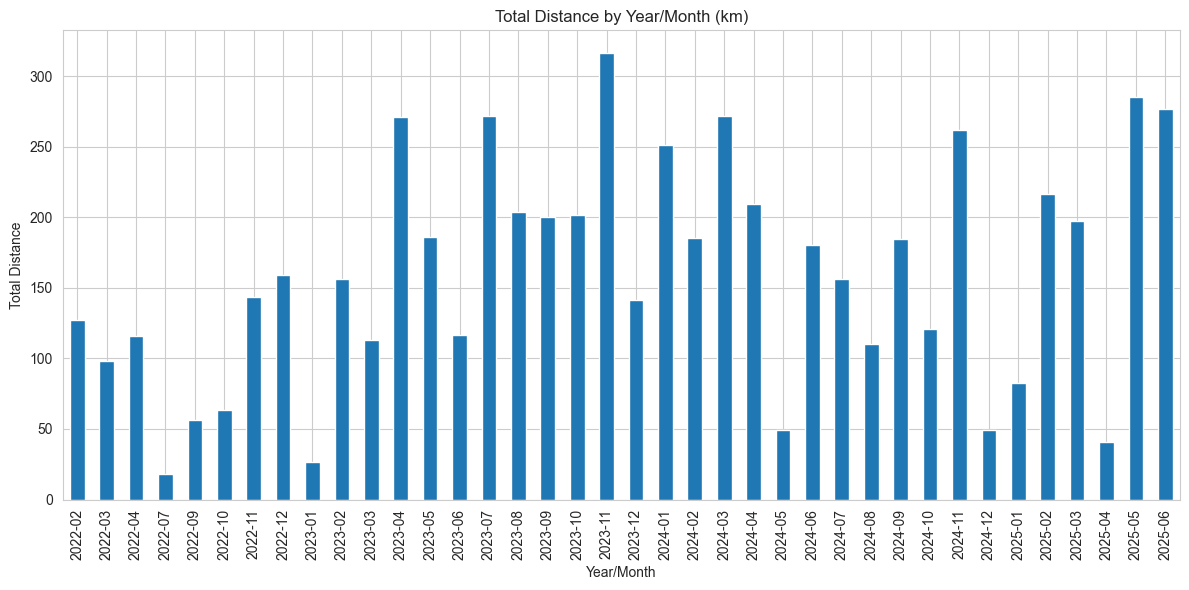

In [10]:
df_ride['YearMonth'] = df_ride['Activity Date'].dt.to_period('M')
df_ride.groupby('YearMonth')['Distance'].sum().plot(kind='bar', figsize=(12, 6), title='Total Distance by Year/Month (km)')
plt.xlabel('Year/Month')
plt.ylabel('Total Distance')
plt.tight_layout()
plt.show()

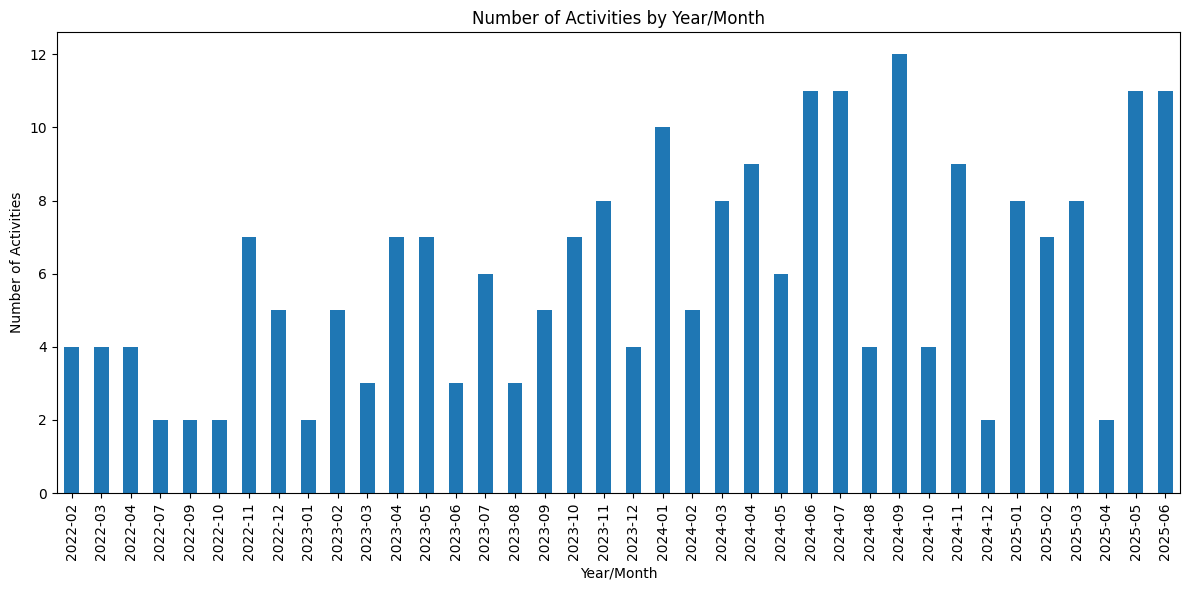

In [39]:
df_ride.groupby('YearMonth')['Activity ID'].count().plot(kind='bar', figsize=(12, 6), title='Number of Activities by Year/Month')
plt.xlabel('Year/Month')
plt.ylabel('Number of Activities')
plt.tight_layout()
plt.show()

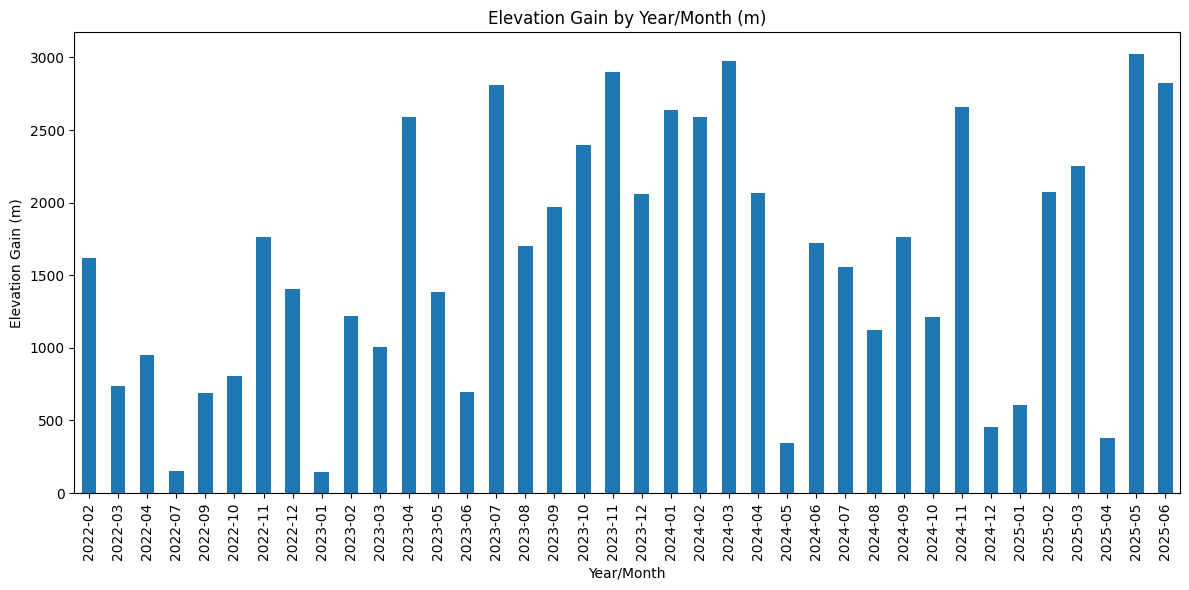

In [41]:
df_ride.groupby('YearMonth')['Elevation Gain'].sum().plot(kind='bar', figsize=(12, 6), title='Elevation Gain by Year/Month (m)')
plt.xlabel('Year/Month')
plt.ylabel('Elevation Gain (m)')
plt.tight_layout()
plt.show()

In [14]:
df_max_hart_rate = df_ride[df_ride['Max Heart Rate'].notnull()]

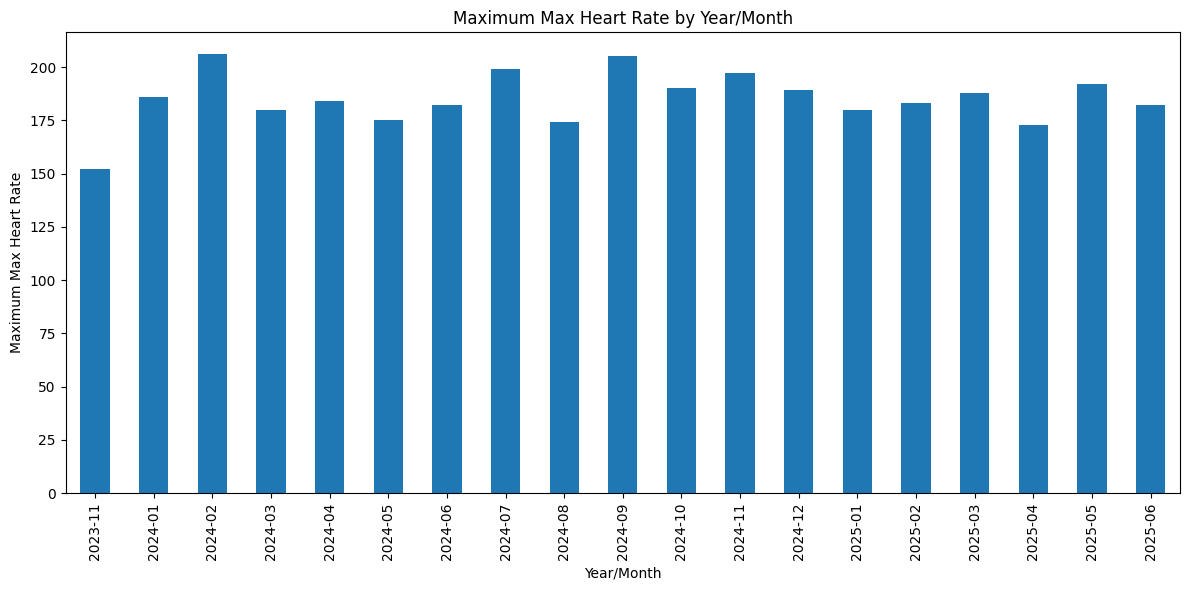

In [46]:
df_max_hart_rate.groupby('YearMonth')['Max Heart Rate'].max().plot(kind='bar', figsize=(12, 6), title='Maximum Max Heart Rate by Year/Month')
plt.xlabel('Year/Month')
plt.ylabel('Maximum Max Heart Rate')
plt.tight_layout()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17436\2097965843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_max_hart_rate['YearSemester'] = df_ride['Activity Date'].dt.to_period('2Q')


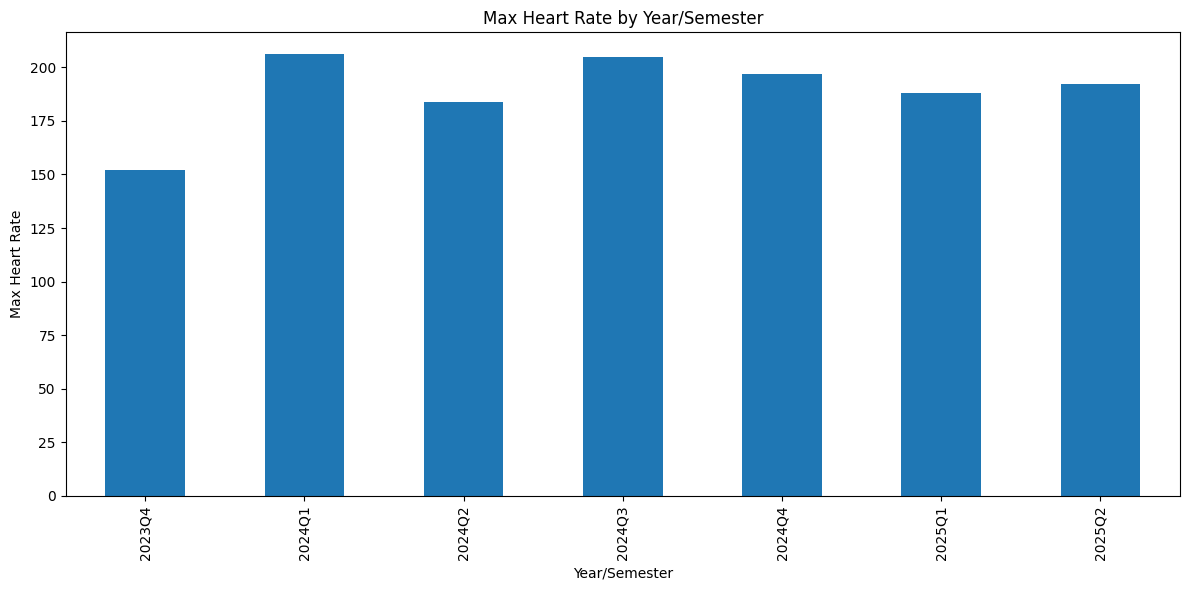

In [48]:
df_max_hart_rate['YearSemester'] = df_ride['Activity Date'].dt.to_period('2Q')
df_max_hart_rate.groupby('YearSemester')['Max Heart Rate'].max().plot(kind='bar', figsize=(12, 6), title='Max Heart Rate by Year/Semester')
plt.xlabel('Year/Semester')
plt.ylabel('Max Heart Rate')
plt.tight_layout()
plt.show()

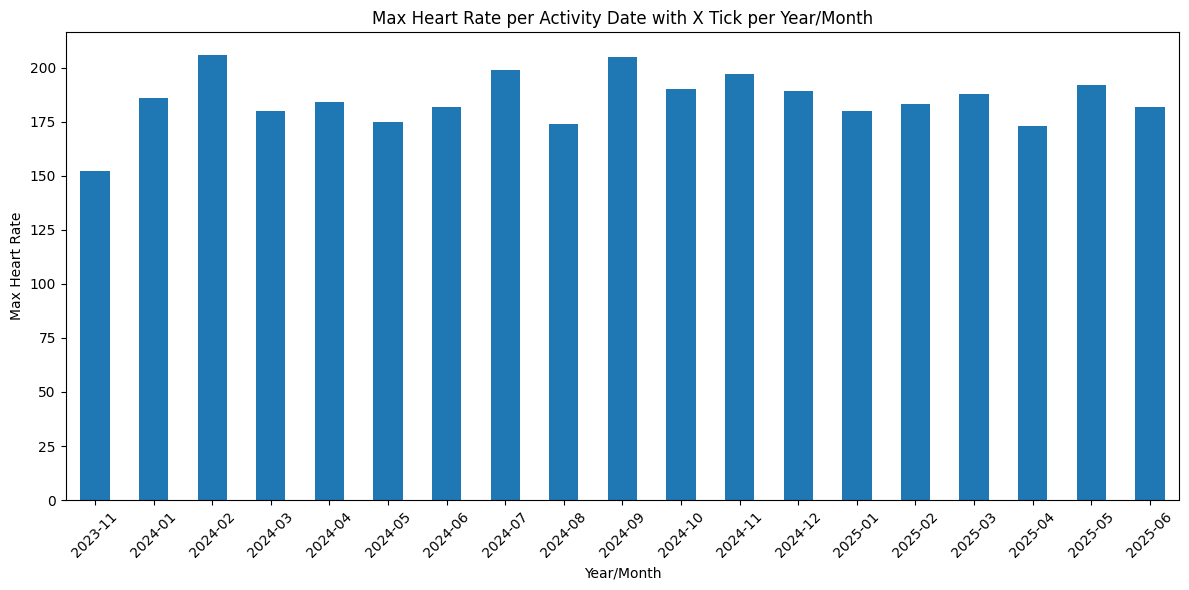

In [51]:
df_max_hart_rate.groupby(df_max_hart_rate['Activity Date'].dt.to_period('M'))['Max Heart Rate'].max().plot(
    kind='bar', figsize=(12, 6), title='Max Heart Rate per Activity Date with X Tick per Year/Month')
plt.xticks(rotation=45)
plt.xlabel('Year/Month')
plt.ylabel('Max Heart Rate')
plt.tight_layout()
plt.show()

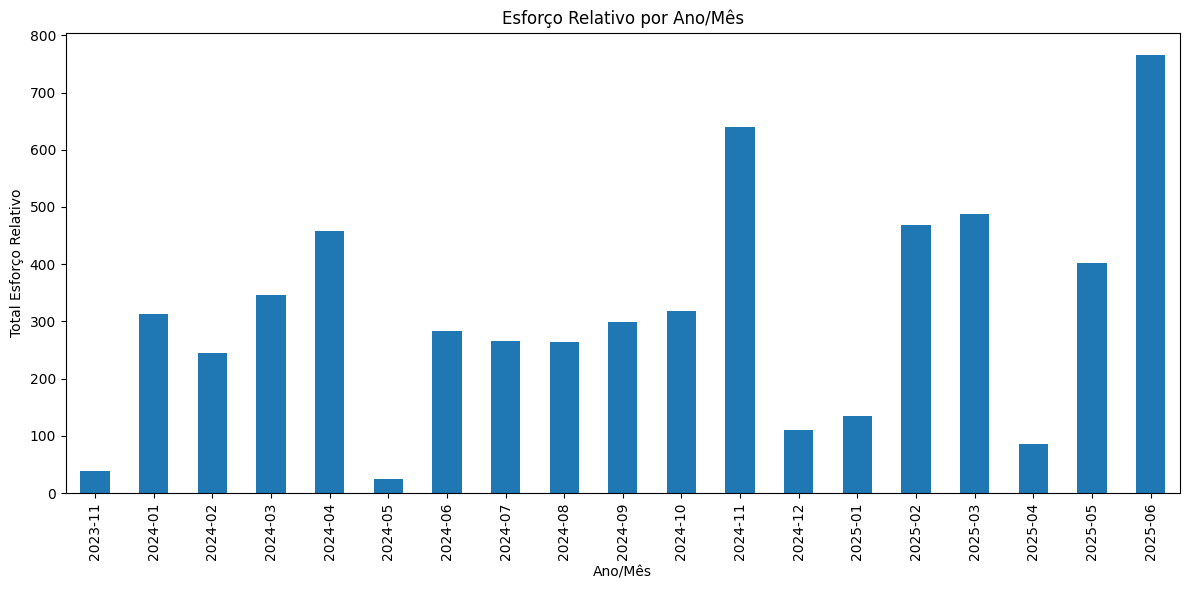

In [61]:
df_max_hart_rate.groupby('YearMonth')['Relative Effort'].sum().plot(kind='bar', figsize=(12, 6), title='Esforço Relativo por Ano/Mês')
plt.xlabel('Ano/Mês')
plt.ylabel('Total Esforço Relativo')
plt.tight_layout()
plt.show()

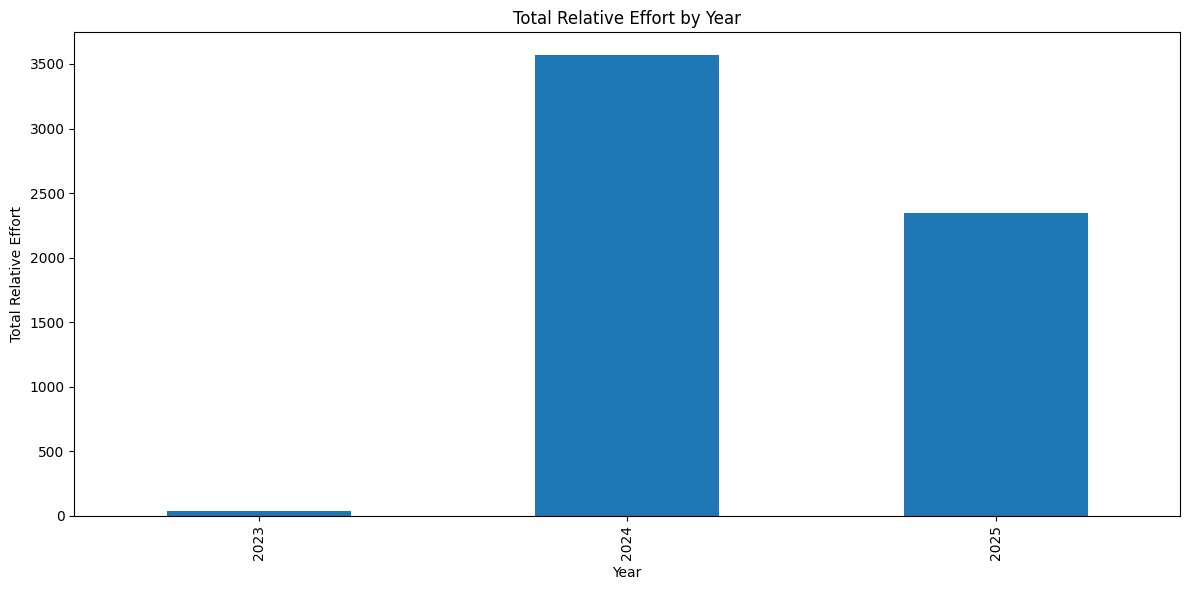

In [54]:
df_max_hart_rate.groupby(df_max_hart_rate['Activity Date'].dt.year)['Relative Effort'].sum().plot(kind='bar', figsize=(12, 6), title='Total Relative Effort by Year')
plt.xlabel('Year')
plt.ylabel('Total Relative Effort')
plt.tight_layout()
plt.show()

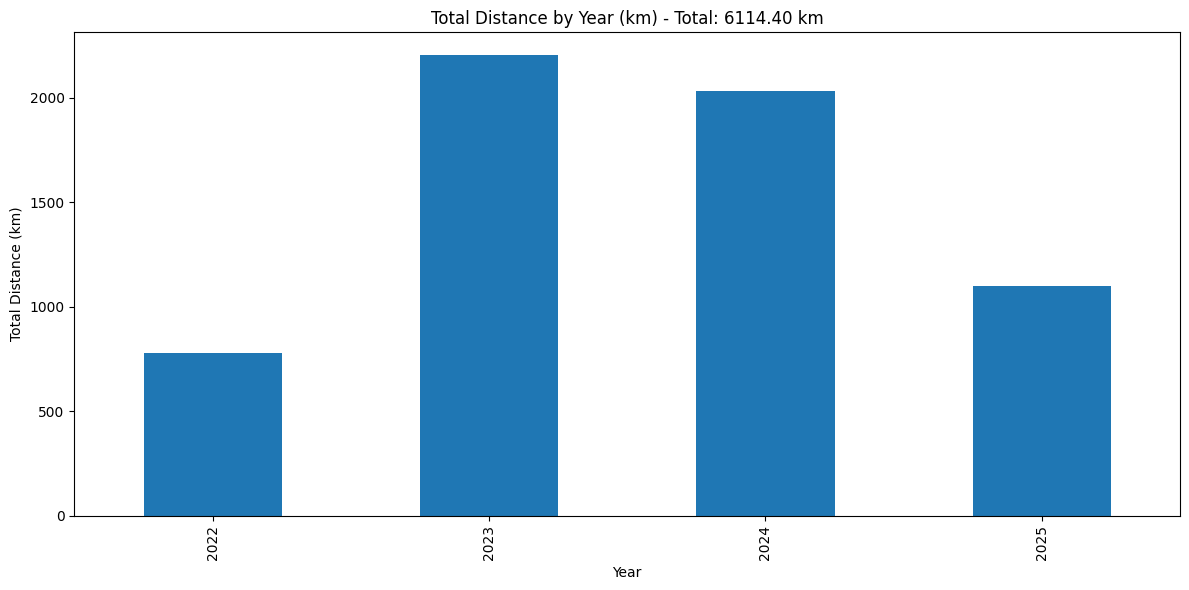

In [58]:
total_distance = df_ride['Distance'].sum()
df_ride.groupby(df_ride['Activity Date'].dt.year)['Distance'].sum().plot(
    kind='bar', figsize=(12, 6), title=f'Total Distance by Year (km) - Total: {total_distance:.2f} km'
)
plt.xlabel('Year')
plt.ylabel('Total Distance (km)')
plt.tight_layout()
plt.show()

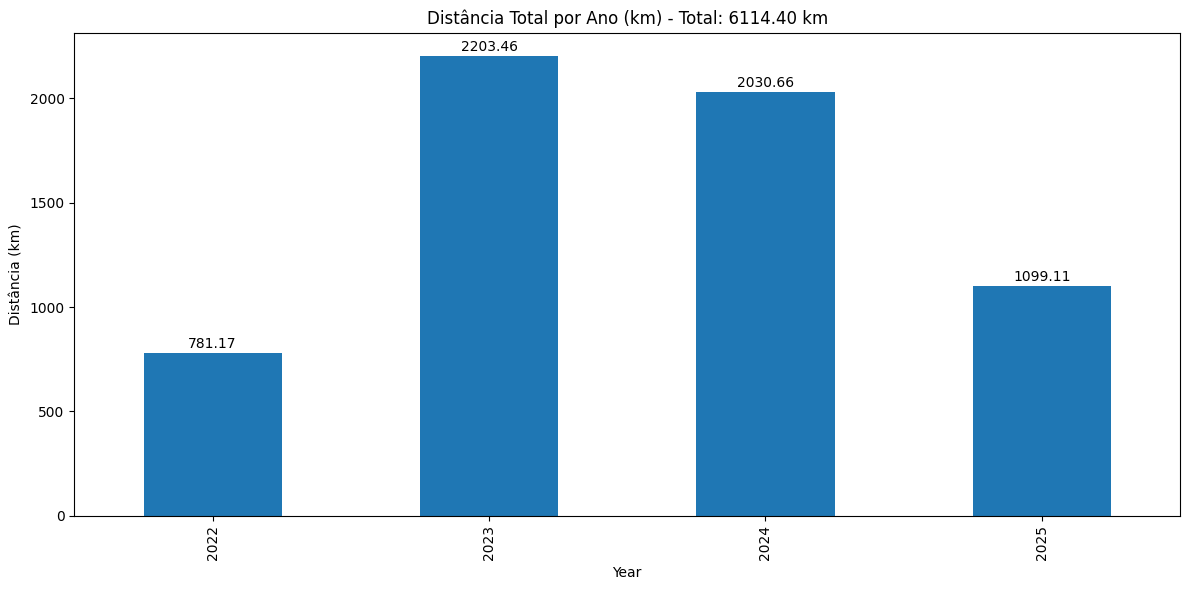

In [62]:
distance_by_year = df_ride.groupby(df_ride['Activity Date'].dt.year)['Distance'].sum()
total_distance = distance_by_year.sum()

ax = distance_by_year.plot(kind='bar', figsize=(12, 6),
                           title=f"Distância Total por Ano (km) - Total: {total_distance:.2f} km")
plt.xlabel('Year')
plt.ylabel('Distância (km)')

for i, v in enumerate(distance_by_year):
    ax.text(i, v + 10, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [63]:
df_ride[df_ride['Activity Date'].dt.year == 2025].to_excel(r"D:\Atrium\Projects\Strava\data\activities2025.xlsx", index=False)

47

In [69]:

df_ride.to_excel(r"D:\Atrium\Projects\Strava\data\activities.xlsx", index=False)


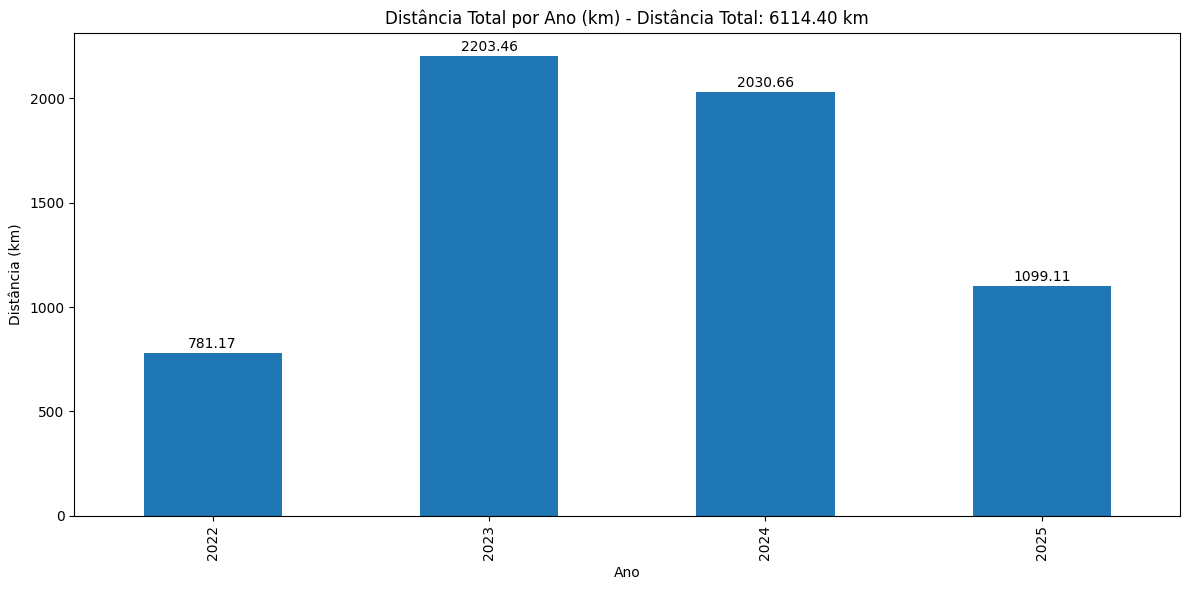

In [71]:
distance_by_year = df_ride.groupby(df_ride['Activity Date'].dt.year)['Distance'].sum()
total_distance = distance_by_year.sum()

ax = distance_by_year.plot(kind='bar', figsize=(12, 6),
                           title=f"Distância Total por Ano (km) - Distância Total: {total_distance:.2f} km")
plt.xlabel('Ano')
plt.ylabel('Distância (km)')

for i, v in enumerate(distance_by_year):
    ax.text(i, v + 10, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

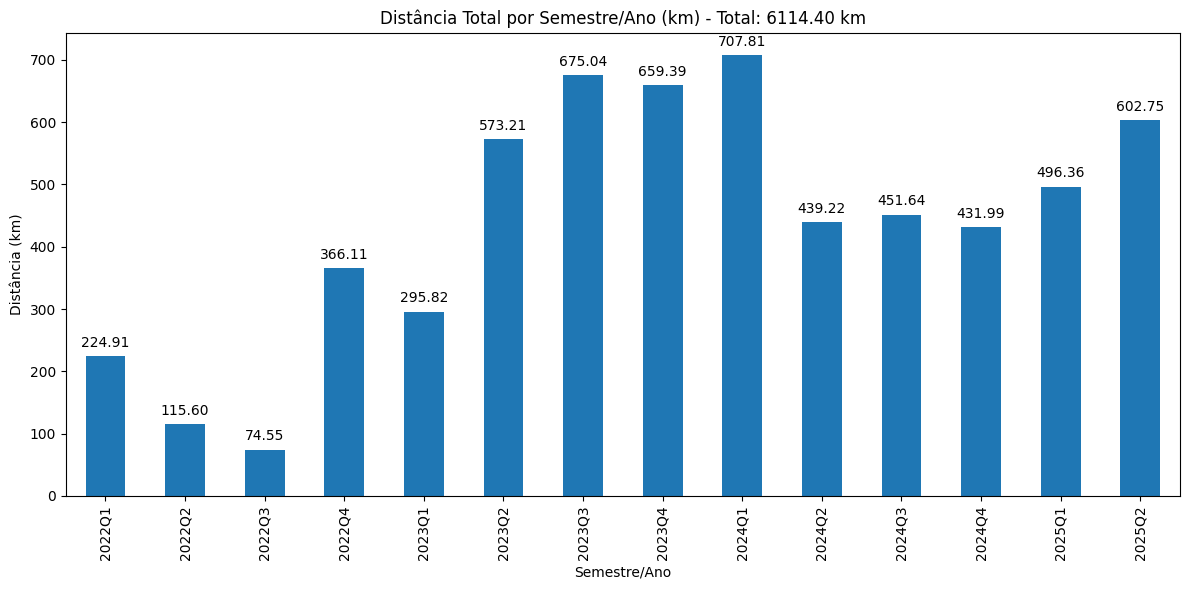

In [72]:
df_ride['YearSemester'] = df_ride['Activity Date'].dt.to_period('2Q')
distance_by_semester = df_ride.groupby('YearSemester')['Distance'].sum()
total_distance = distance_by_semester.sum()

ax = distance_by_semester.plot(kind='bar', figsize=(12, 6),
                               title=f"Distância Total por Semestre/Ano (km) - Total: {total_distance:.2f} km")
plt.xlabel('Semestre/Ano')
plt.ylabel('Distância (km)')

for i, v in enumerate(distance_by_semester):
    ax.text(i, v + 10, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

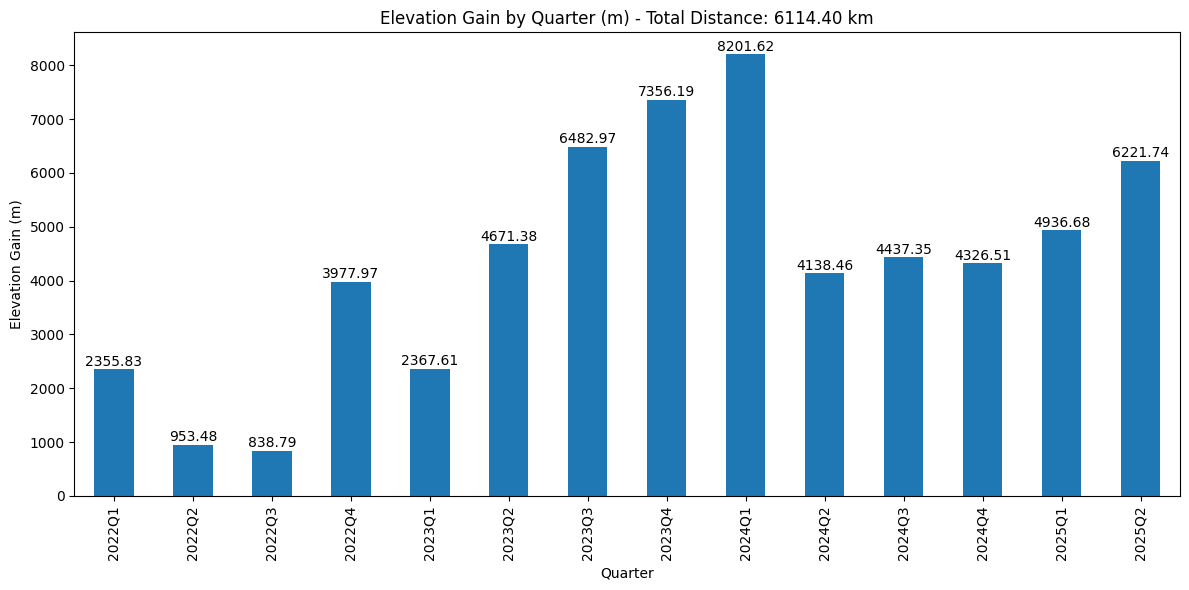

In [73]:
df_ride['Quarter'] = df_ride['Activity Date'].dt.to_period('Q')
distance_by_quarter = df_ride.groupby('Quarter')['Elevation Gain'].sum()
total_distance = df_ride['Distance'].sum()

ax = distance_by_quarter.plot(kind='bar', figsize=(12, 6),
                              title=f"Elevation Gain by Quarter (m) - Total Distance: {total_distance:.2f} km")
plt.xlabel('Quarter')
plt.ylabel('Elevation Gain (m)')

for i, v in enumerate(distance_by_quarter):
    ax.text(i, v + 10, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

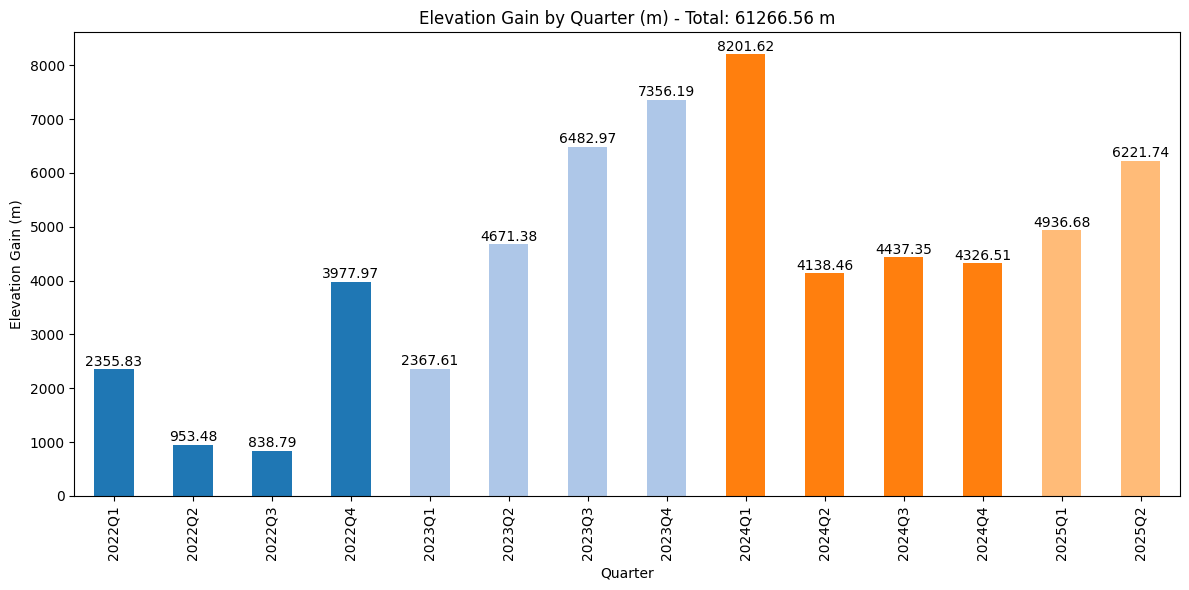

In [75]:
df_ride['Quarter'] = df_ride['Activity Date'].dt.to_period('Q')
distance_by_quarter = df_ride.groupby('Quarter')['Elevation Gain'].sum()
total_elevation = distance_by_quarter.sum()

palette = sns.color_palette("tab20", len(distance_by_quarter.index.year.unique()))
colors = [palette[y - distance_by_quarter.index.year.min()] for y in distance_by_quarter.index.year]

ax = distance_by_quarter.plot(kind='bar', color=colors, figsize=(12, 6),
                              title=f"Elevation Gain by Quarter (m) - Total: {total_elevation:.2f} m")
plt.xlabel('Quarter')
plt.ylabel('Elevation Gain (m)')

for i, v in enumerate(distance_by_quarter):
    ax.text(i, v + 10, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

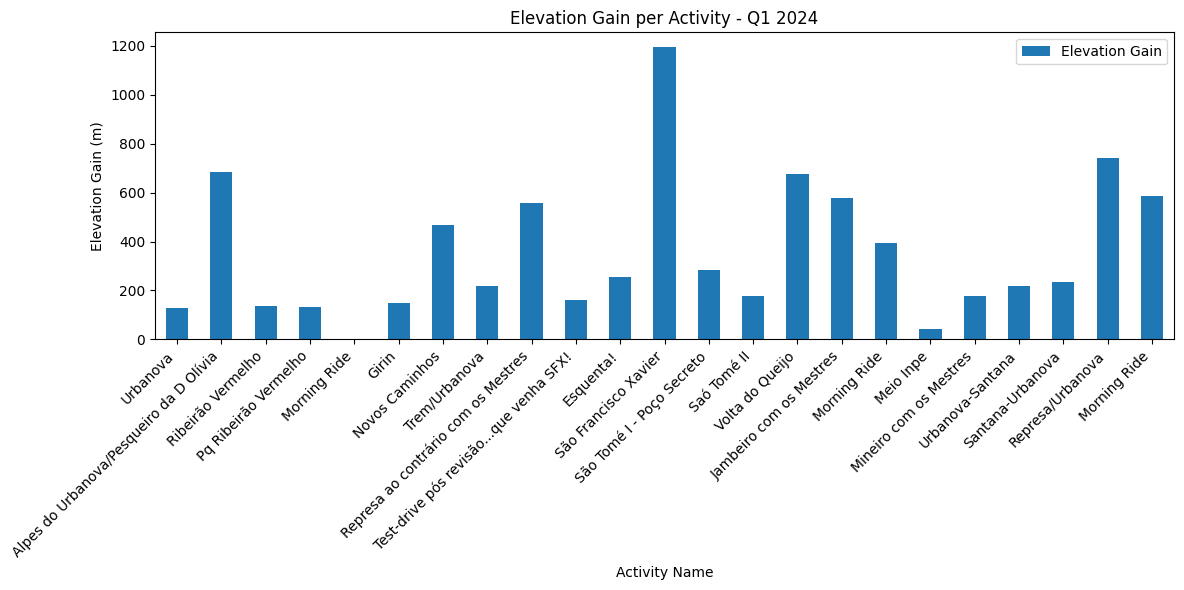

In [76]:
df_2024_q1 = df_ride[(df_ride['Activity Date'].dt.to_period('Q') == '2024Q1')]
df_2024_q1.plot.bar(x='Activity Name', y='Elevation Gain', figsize=(12, 6), title='Elevation Gain per Activity - Q1 2024')
plt.xlabel('Activity Name')
plt.ylabel('Elevation Gain (m)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

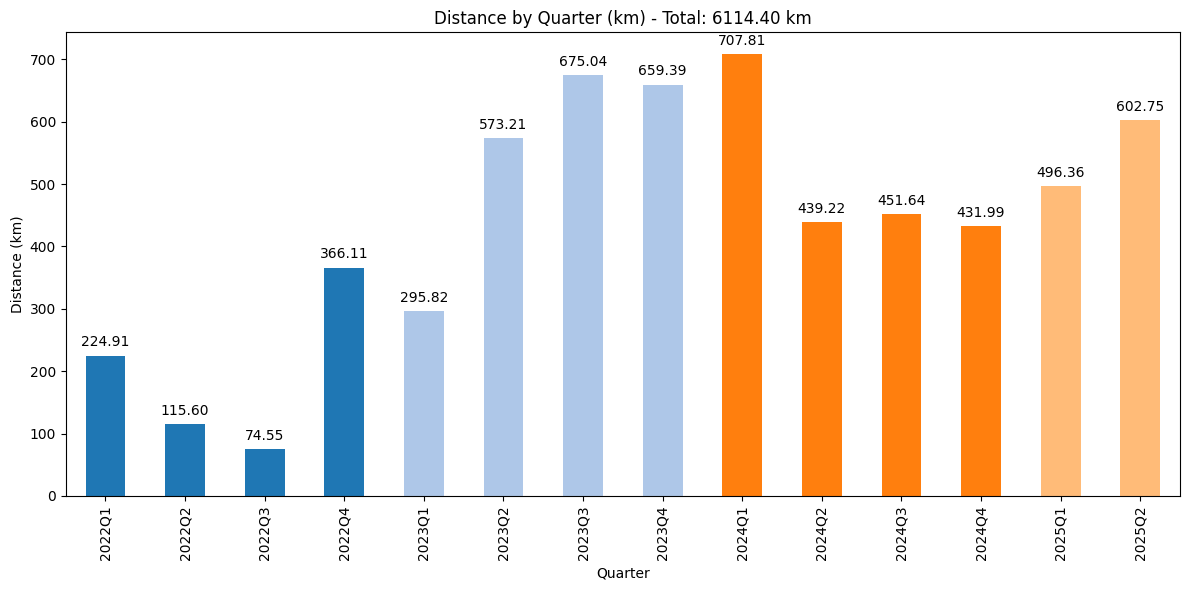

In [84]:
import seaborn as sns

df_ride['Quarter'] = df_ride['Activity Date'].dt.to_period('Q')
distance_by_quarter = df_ride.groupby('Quarter')['Distance'].sum()
total_elevation = distance_by_quarter.sum()

palette = sns.color_palette("tab20", len(distance_by_quarter.index.year.unique()))
colors = [palette[y - distance_by_quarter.index.year.min()] for y in distance_by_quarter.index.year]

ax = distance_by_quarter.plot(kind='bar', color=colors, figsize=(12, 6),
                              title=f"Distance by Quarter (km) - Total: {total_elevation:.2f} km")
plt.xlabel('Quarter')
plt.ylabel('Distance (km)')

for i, v in enumerate(distance_by_quarter):
    ax.text(i, v + 10, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

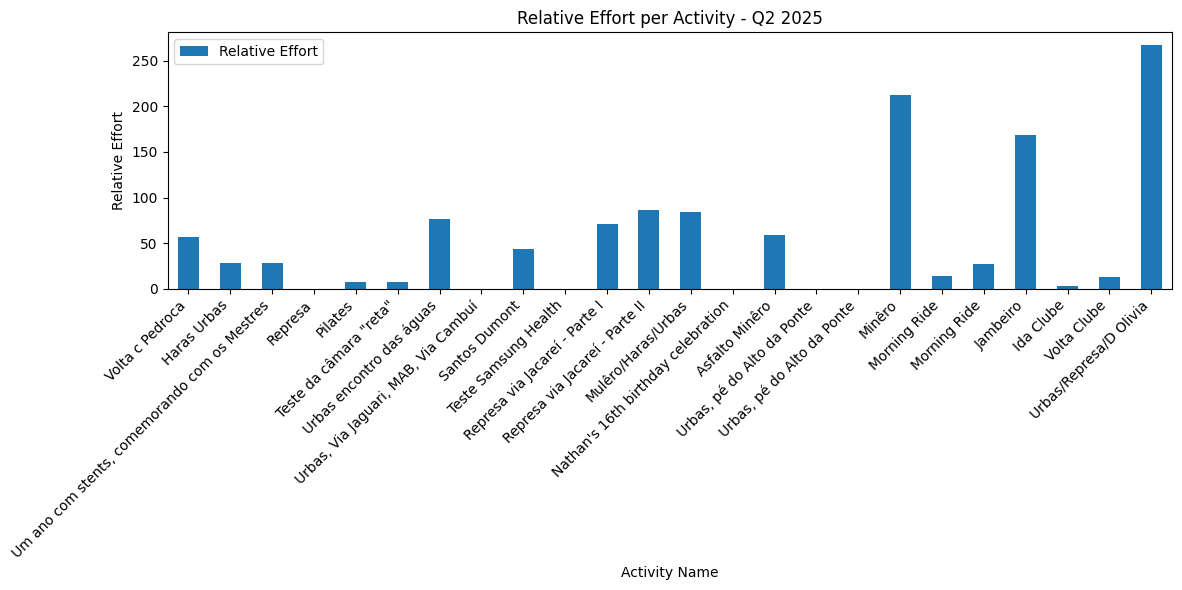

In [80]:
df_2024_q1 = df_ride[(df_ride['Activity Date'].dt.to_period('Q') == '2025Q2')]
df_2024_q1.plot.bar(x='Activity Name', y='Relative Effort', figsize=(12, 6), title='Relative Effort per Activity - Q2 2025')
plt.xlabel('Activity Name')
plt.ylabel('Relative Effort')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [15]:
df_max_hart_rate.dtypes

Activity ID                             int64
Activity Date                  datetime64[ns]
Activity Name                          object
Activity Type                          object
Elapsed Time                            int64
                                    ...      
Total Steps                           float64
Carbon Saved                          float64
Average Grade Adjusted Pace           float64
Media                                  object
YearMonth                           period[M]
Length: 61, dtype: object

Correlation Coefficient: 0.49


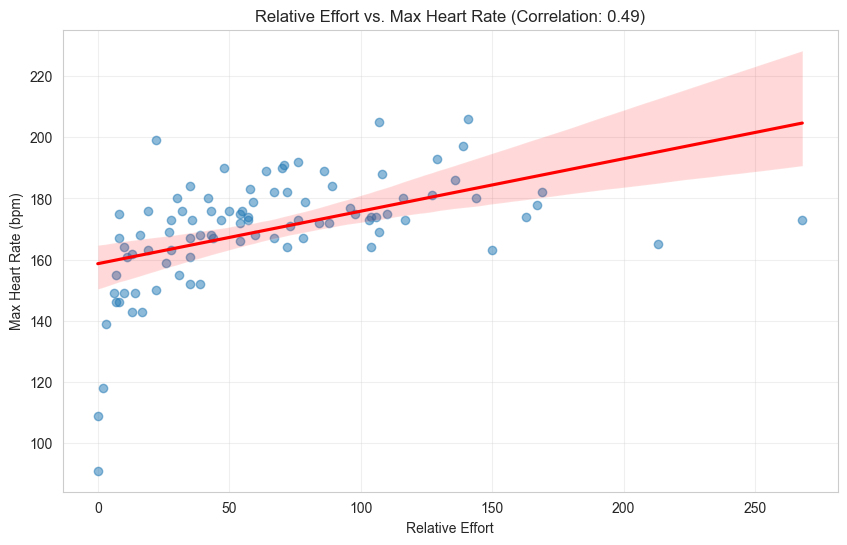

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Clean data: Drop rows with missing values in the two columns
df_clean = df_max_hart_rate.dropna(subset=['Relative Effort', 'Max Heart Rate'])

# Calculate correlation coefficient
correlation = df_clean[['Relative Effort', 'Max Heart Rate']].corr().iloc[0, 1]
print(f"Correlation Coefficient: {correlation:.2f}")

# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_clean,
    x='Relative Effort',
    y='Max Heart Rate',
    scatter_kws={'alpha': 0.5},  # Make points semi-transparent
    line_kws={'color': 'red'}    # Regression line color
)
plt.title(f"Relative Effort vs. Max Heart Rate (Correlation: {correlation:.2f})")
plt.xlabel('Relative Effort')
plt.ylabel('Max Heart Rate (bpm)')
plt.grid(alpha=0.3)
plt.show()


Correlation Coefficient: 0.54


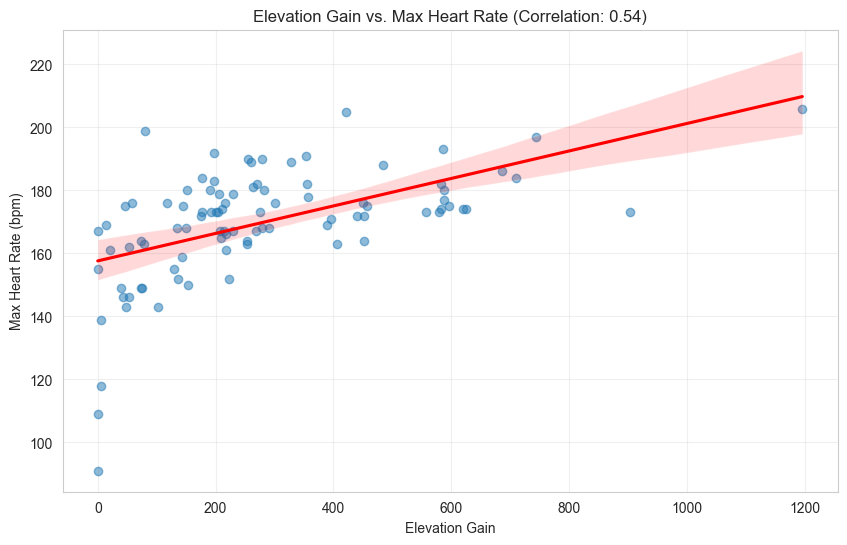

In [23]:



# Clean data: Drop rows with missing values in the two columns
df_clean = df_max_hart_rate.dropna(subset=['Elevation Gain', 'Max Heart Rate'])

# Calculate correlation coefficient
correlation = df_clean[['Elevation Gain', 'Max Heart Rate']].corr().iloc[0, 1]
print(f"Correlation Coefficient: {correlation:.2f}")

# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_clean,
    x='Elevation Gain',
    y='Max Heart Rate',
    scatter_kws={'alpha': 0.5},  # Make points semi-transparent
    line_kws={'color': 'red'}    # Regression line color
)
plt.title(f"Elevation Gain vs. Max Heart Rate (Correlation: {correlation:.2f})")
plt.xlabel('Elevation Gain')
plt.ylabel('Max Heart Rate (bpm)')
plt.grid(alpha=0.3)
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23272\2034416147.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_max_hart_rate['Month'] = df_max_hart_rate['Activity Date'].dt.to_period('M')


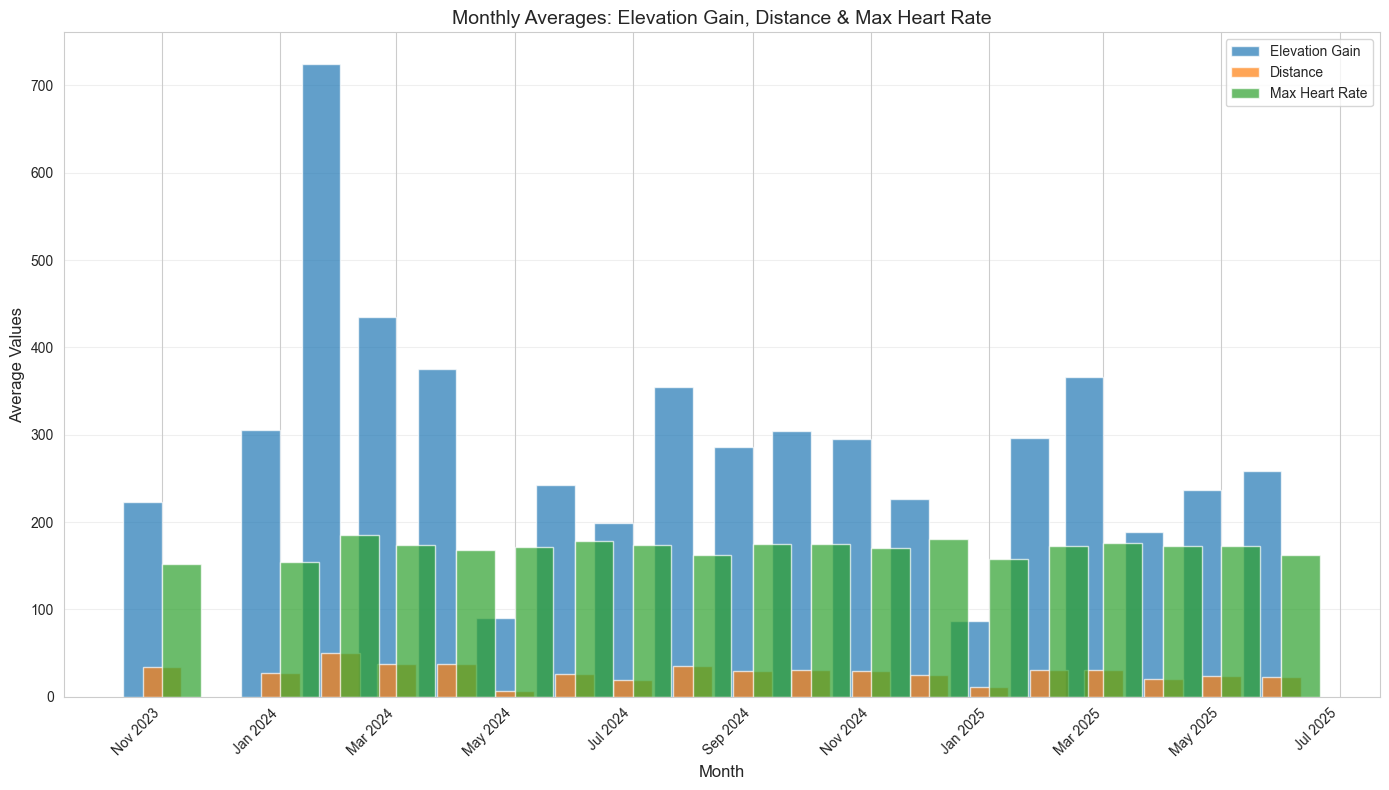

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from calendar import month_abbr

# 1. Ensure required columns exist
required_cols = ['Activity Date', 'Elevation Gain', 'Distance', 'Max Heart Rate']
if not all(col in df_max_hart_rate.columns for col in required_cols):
    missing = [col for col in required_cols if col not in df_max_hart_rate.columns]
    raise ValueError(f"Missing columns: {missing}")

# 2. Extract month/year and aggregate
df_max_hart_rate['Month'] = df_max_hart_rate['Activity Date'].dt.to_period('M')
monthly_avg = df_max_hart_rate.groupby('Month').agg({
    'Elevation Gain': 'mean',
    'Distance': 'mean',
    'Max Heart Rate': 'mean'
}).reset_index()

# Convert Period to Timestamp for plotting
monthly_avg['Month'] = monthly_avg['Month'].dt.to_timestamp()

# 3. Create plot
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 20  # Width in days (for date-based x-axis)

# Plot each metric
ax.bar(
    monthly_avg['Month'] - pd.Timedelta(days=10),  # Offset for grouped bars
    monthly_avg['Elevation Gain'],
    width=bar_width,
    label='Elevation Gain',
    alpha=0.7
)

ax.bar(
    monthly_avg['Month'],
    monthly_avg['Distance'],
    width=bar_width,
    label='Distance',
    alpha=0.7
)

ax.bar(
    monthly_avg['Month'] + pd.Timedelta(days=10),  # Offset for grouped bars
    monthly_avg['Max Heart Rate'],
    width=bar_width,
    label='Max Heart Rate',
    alpha=0.7
)

# 4. Format plot
ax.set_title('Monthly Averages: Elevation Gain, Distance & Max Heart Rate', fontsize=14)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Average Values', fontsize=12)
ax.legend(loc='upper right')
ax.grid(axis='y', alpha=0.3)

# Format x-axis as month names
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate(rotation=45)
plt.tight_layout()
plt.show()

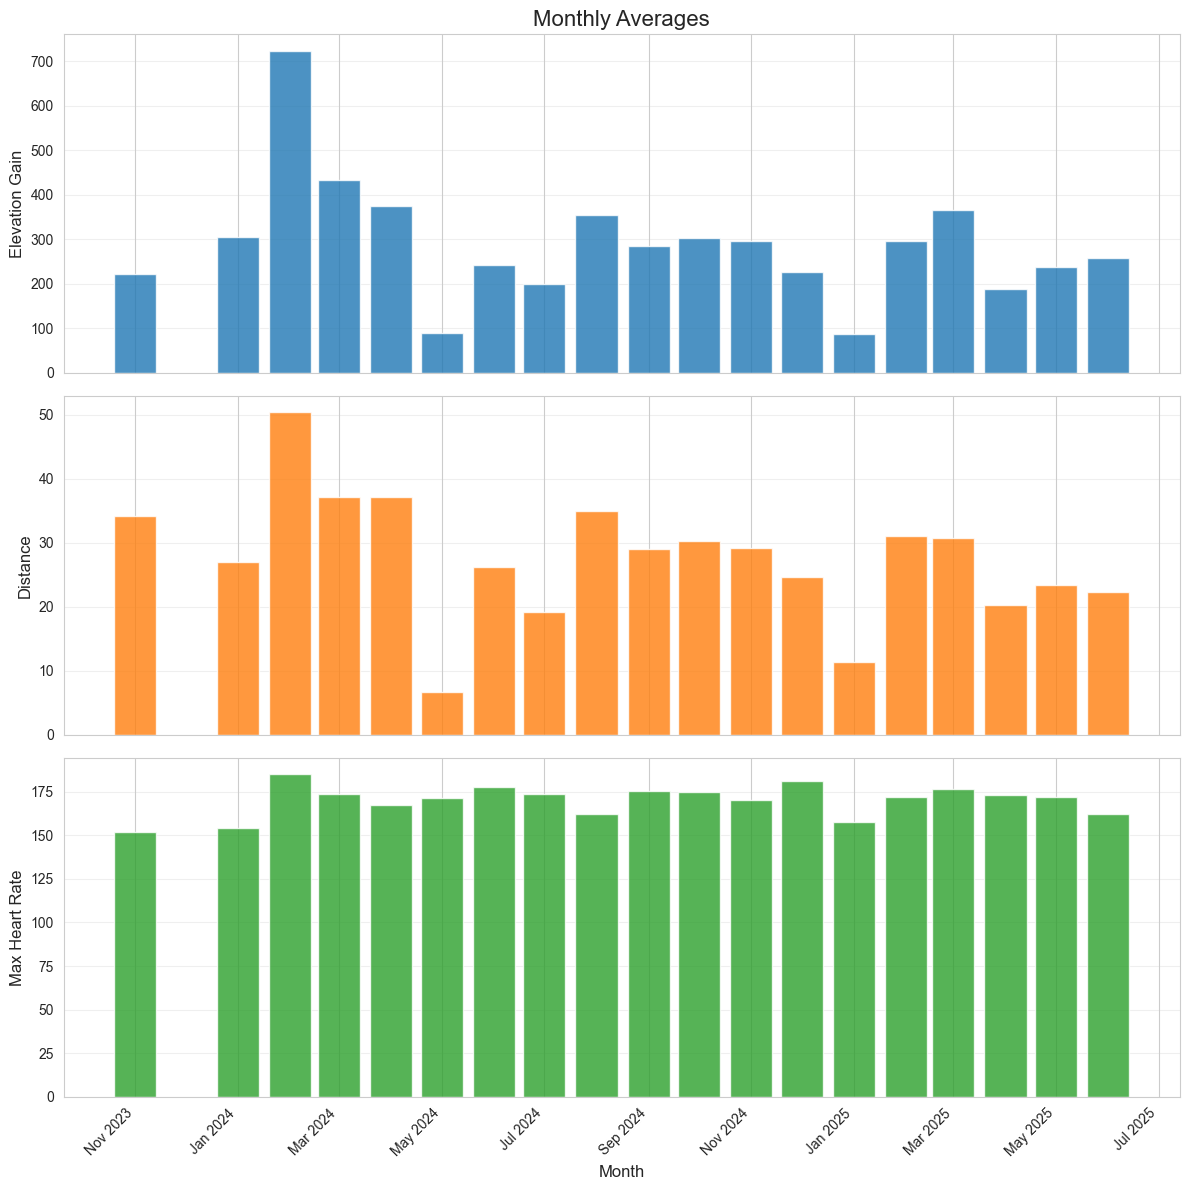

In [27]:
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
metrics = ['Elevation Gain', 'Distance', 'Max Heart Rate']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for ax, metric, color in zip(axes, metrics, colors):
    ax.bar(monthly_avg['Month'], monthly_avg[metric], width=25, color=color, alpha=0.8)
    ax.set_ylabel(metric, fontsize=12)
    ax.grid(axis='y', alpha=0.3)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

axes[0].set_title('Monthly Averages', fontsize=16)
axes[-1].set_xlabel('Month', fontsize=12)
fig.autofmt_xdate(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
df_max_heart_rate = df_ride[df_ride['Max Heart Rate'].notnull()]

Correlation Coefficient: 0.49


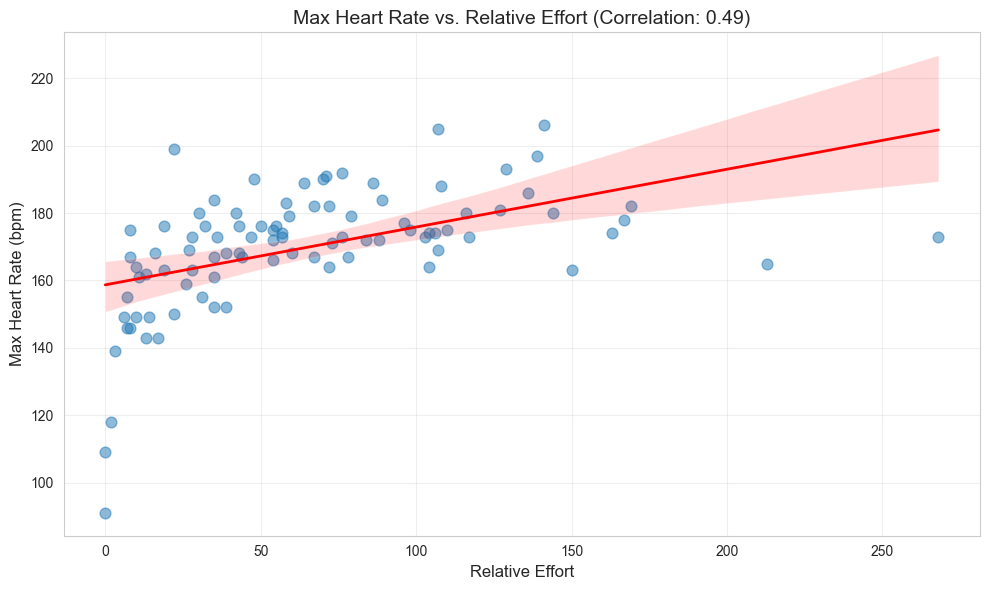

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Use df_max_heart_rate
df_clean = df_max_heart_rate.dropna(subset=['Relative Effort', 'Max Heart Rate'])

# Calculate correlation using max values
correlation = df_clean[['Relative Effort', 'Max Heart Rate']].corr().iloc[0, 1]
print(f"Correlation Coefficient: {correlation:.2f}")

# Plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_clean,
    x='Relative Effort',
    y='Max Heart Rate',
    scatter_kws={'alpha': 0.5, 's': 60},
    line_kws={'color': 'red', 'lw': 2}
)
plt.title(f"Max Heart Rate vs. Relative Effort (Correlation: {correlation:.2f})", fontsize=14)
plt.xlabel('Relative Effort', fontsize=12)
plt.ylabel('Max Heart Rate (bpm)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23272\255791169.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_max_heart_rate['Month'] = df_max_heart_rate['Activity Date'].dt.to_period('M')


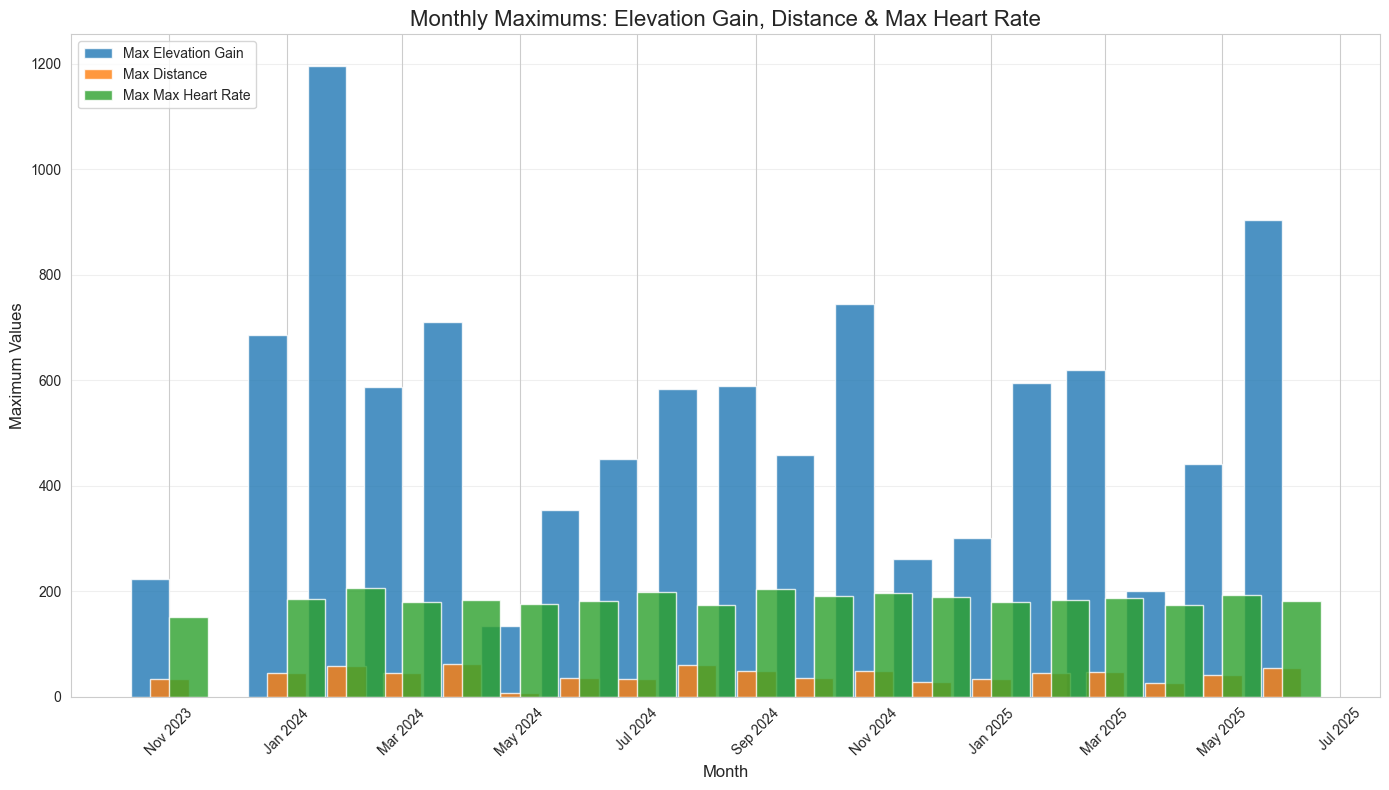

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create monthly max values
df_max_heart_rate['Month'] = df_max_heart_rate['Activity Date'].dt.to_period('M')
monthly_max = df_max_heart_rate.groupby('Month').agg({
    'Elevation Gain': 'max',
    'Distance': 'max',
    'Max Heart Rate': 'max'
}).reset_index()

# Convert to Timestamp for plotting
monthly_max['Month'] = monthly_max['Month'].dt.to_timestamp()

# Plot configuration
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 20  # Width in days

# Plot each metric with max values
metrics = {
    'Elevation Gain': '#1f77b4',
    'Distance': '#ff7f0e',
    'Max Heart Rate': '#2ca02c'
}

offsets = [-10, 0, 10]  # Day offsets for each bar
for i, (metric, color) in enumerate(metrics.items()):
    ax.bar(
        monthly_max['Month'] + pd.Timedelta(days=offsets[i]),
        monthly_max[metric],
        width=bar_width,
        label=f'Max {metric}',
        color=color,
        alpha=0.8
    )

# Format plot
ax.set_title('Monthly Maximums: Elevation Gain, Distance & Max Heart Rate', fontsize=16)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Maximum Values', fontsize=12)
ax.legend(loc='upper left')
ax.grid(axis='y', alpha=0.3)

# Format x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23272\255791169.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_max_heart_rate['Month'] = df_max_heart_rate['Activity Date'].dt.to_period('M')


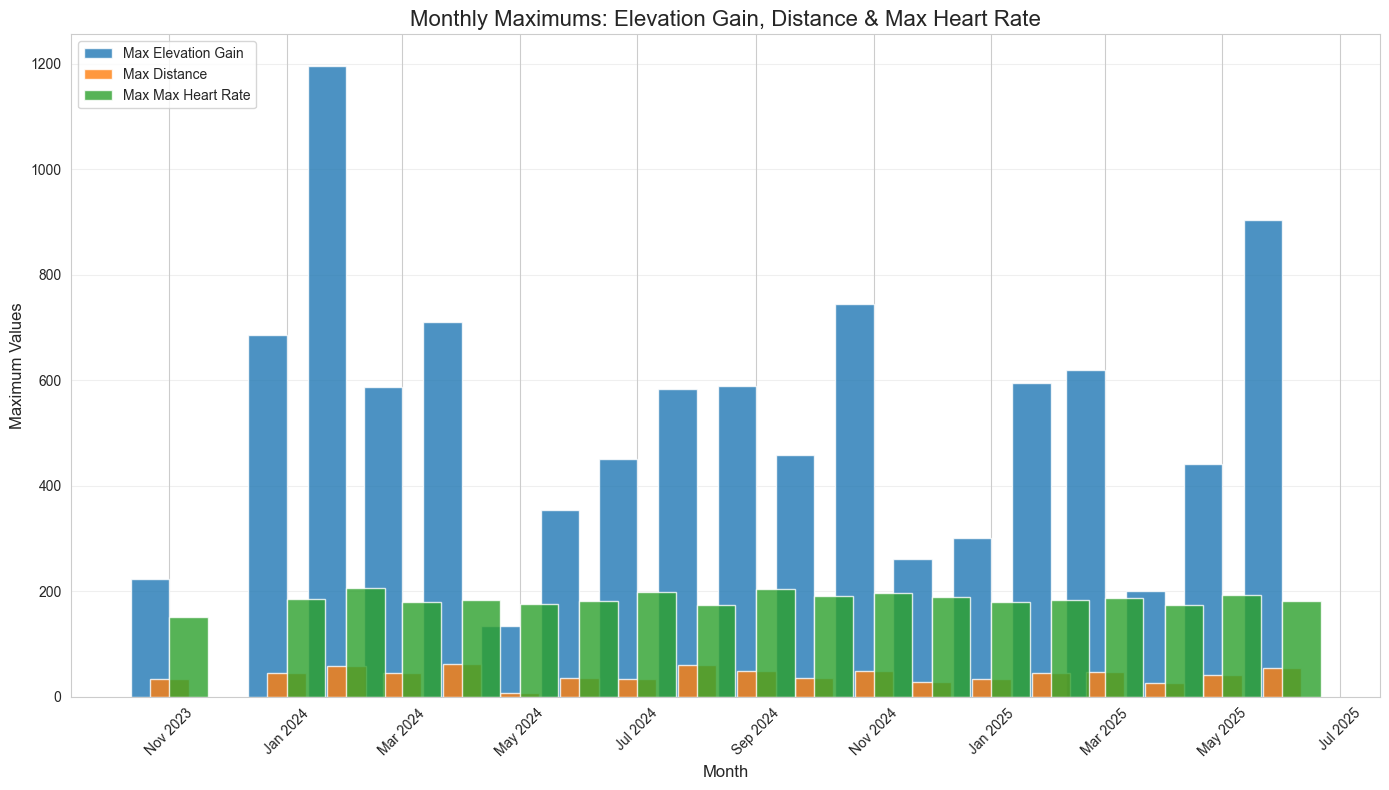

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create monthly max values
df_max_heart_rate['Month'] = df_max_heart_rate['Activity Date'].dt.to_period('M')
monthly_max = df_max_heart_rate.groupby('Month').agg({
    'Elevation Gain': 'max',
    'Distance': 'max',
    'Max Heart Rate': 'max'
}).reset_index()

# Convert to Timestamp for plotting
monthly_max['Month'] = monthly_max['Month'].dt.to_timestamp()

# Plot configuration
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 20  # Width in days

# Plot each metric with max values
metrics = {
    'Elevation Gain': '#1f77b4',
    'Distance': '#ff7f0e',
    'Max Heart Rate': '#2ca02c'
}

offsets = [-10, 0, 10]  # Day offsets for each bar
for i, (metric, color) in enumerate(metrics.items()):
    ax.bar(
        monthly_max['Month'] + pd.Timedelta(days=offsets[i]),
        monthly_max[metric],
        width=bar_width,
        label=f'Max {metric}',
        color=color,
        alpha=0.8
    )

# Format plot
ax.set_title('Monthly Maximums: Elevation Gain, Distance & Max Heart Rate', fontsize=16)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Maximum Values', fontsize=12)
ax.legend(loc='upper left')
ax.grid(axis='y', alpha=0.3)

# Format x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

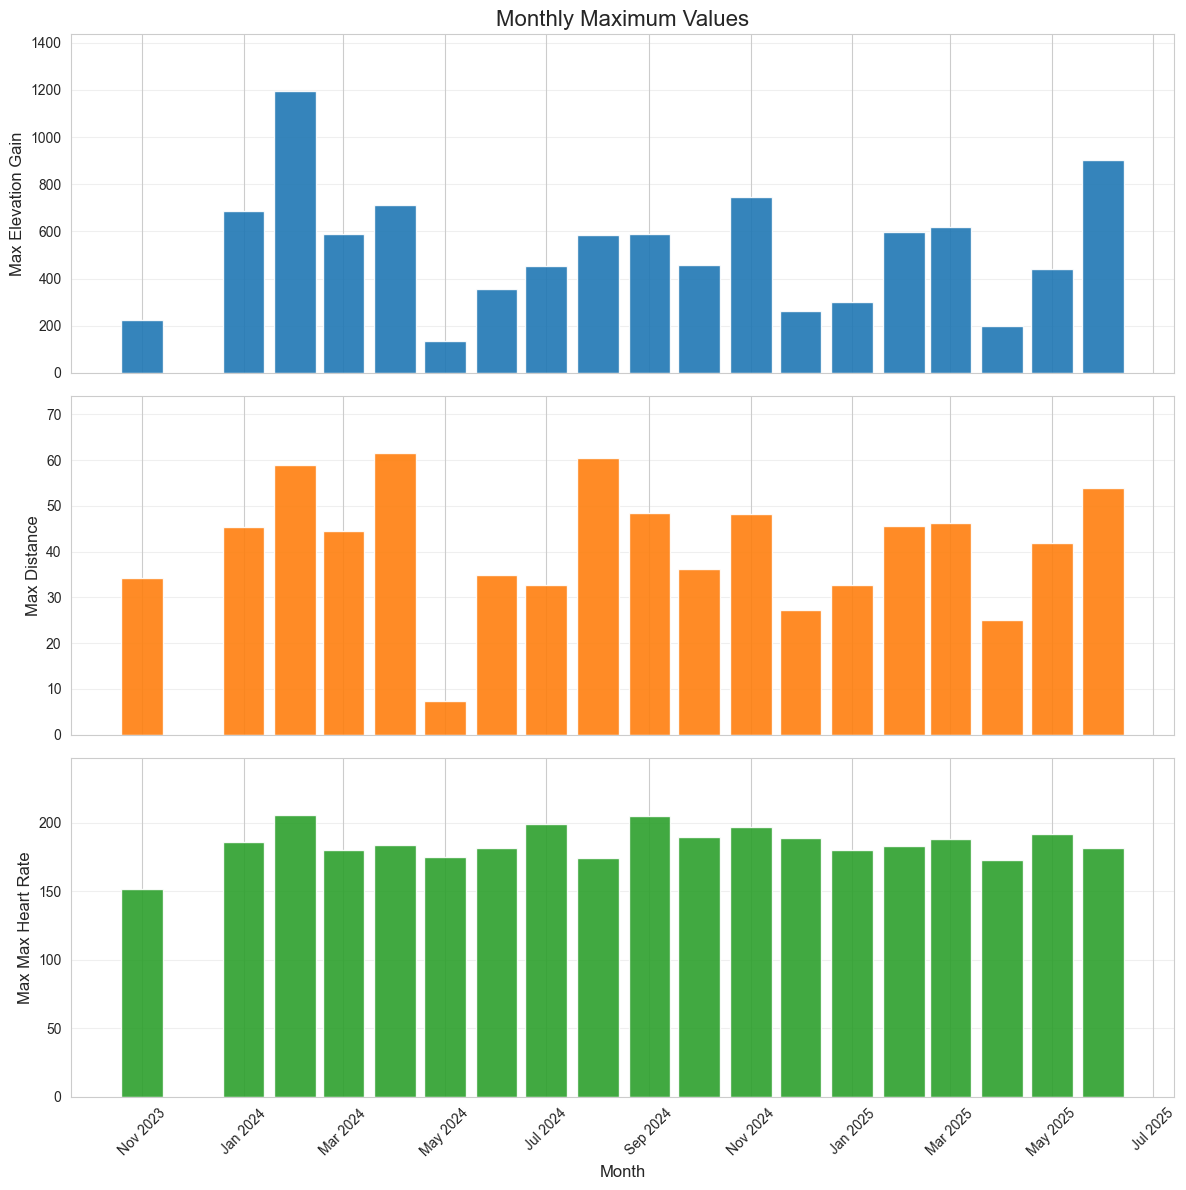

In [35]:
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for i, metric in enumerate(['Elevation Gain', 'Distance', 'Max Heart Rate']):
    axes[i].bar(
        monthly_max['Month'],
        monthly_max[metric],
        width=25,
        color=colors[i],
        alpha=0.9
    )
    axes[i].set_ylabel(f'Max {metric}', fontsize=12)
    axes[i].grid(axis='y', alpha=0.3)
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    axes[i].set_ylim(0, monthly_max[metric].max() * 1.2)

axes[0].set_title('Monthly Maximum Values', fontsize=16)
axes[-1].set_xlabel('Month', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()